In [ ]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [ ]:
import tensorflow as tf
dataset_path = "/content/drive/MyDrive/PlantVillage"

IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,

)
# dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     "/content/drive/MyDrive/PlantVillage",
#     seed=123,
#     shuffle=True,
#     image_size=(IMAGE_SIZE,IMAGE_SIZE),
#     batch_size=BATCH_SIZE
# )

Found 1910 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# def SimpleVGG(input_shape, num_classes):
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
#         layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#         layers.MaxPooling2D((2, 2), strides=(2, 2)),

#         # layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#         # layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#         # layers.MaxPooling2D((2, 2), strides=(2, 2)),

#         layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#         layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#         layers.MaxPooling2D((2, 2), strides=(2, 2)),

#         layers.Flatten(),
#         layers.Dense(512, activation='relu'),
#         layers.Dense(num_classes, activation='softmax')
#     ])

#     return model

# # Define input shape and number of classes
# IMAGE_SIZE = 256  # Adjust according to your dataset
# CHANNELS = 3
# input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# num_classes = 10  # Adjust according to your classification task

# # Create simplified VGG model
# simple_vgg_model = SimpleVGG(input_shape, num_classes)

# # Print model summary
# simple_vgg_model.summary()
def UltraSimpleVGG(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create ultra simplified VGG model
ultra_simple_vgg_model = UltraSimpleVGG(input_shape, num_classes)

# Compile the model (if not already compiled)
ultra_simple_vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ultra_simple_vgg_model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
48/48 [==============================] - 283s 6s/step - loss: 51.6527 - accuracy: 0.7123 - val_loss: 0.6947 - val_accuracy: 0.8021
Epoch 2/10
48/48 [==============================] - 274s 6s/step - loss: 0.3943 - accuracy: 0.8558 - val_loss: 0.9804 - val_accuracy: 0.7083
Epoch 3/10
48/48 [==============================] - 271s 6s/step - loss: 0.2571 - accuracy: 0.8952 - val_loss: 0.3277 - val_accuracy: 0.8750
Epoch 4/10
48/48 [==============================] - 269s 6s/step - loss: 0.2145 - accuracy: 0.9214 - val_loss: 0.1691 - val_accuracy: 0.9531
Epoch 5/10
48/48 [==============================] - 271s 6s/step - loss: 0.1854 - accuracy: 0.9332 - val_loss: 0.3025 - val_accuracy: 0.8906
Epoch 6/10
48/48 [==============================] - 281s 6s/step - loss: 0.1806 - accuracy: 0.9338 - val_loss: 0.9757 - val_accuracy: 0.7917
Epoch 7/10
48/48 [==============================] - 272s 6s/step - loss: 0.1813 - accuracy: 0.9312 - val_loss: 0.1649 - val_accuracy: 0.9583
Epoch 8/10
4

In [ ]:
scores =ultra_simple_vgg_model.evaluate(test_ds)

6/6 [==============================] - 8s 1s/step - loss: 0.6516 - accuracy: 0.7396


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

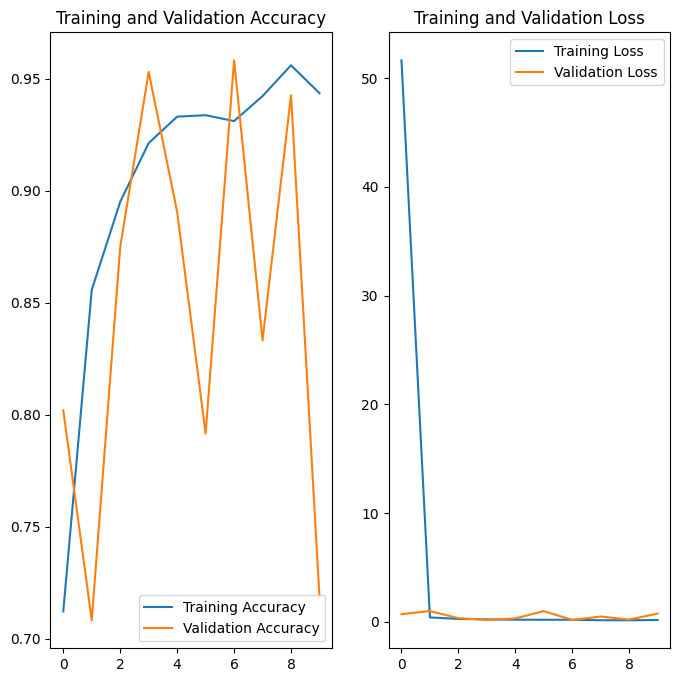

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()